In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle


In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [4]:
df.fips.value_counts()

6037    1393369
6059     539747
6111     161467
Name: fips, dtype: int64

In [5]:
df.T

,4,6,7,11,14,15,18,19,20,21,...,2152850,2152851,2152852,2152853,2152855,2152856,2152858,2152859,2152861,2152862
bedroomcnt,4.00,3.00,3.00,0.0,0.00,0.00,3.00,3.00,3.00,4.0,...,3.00,3.0,3.00,4.00,3.0,4.00,4.00,4.00,3.0,4.0
bathroomcnt,2.00,4.00,2.00,0.0,0.00,0.00,1.00,2.00,2.00,4.0,...,2.50,3.5,2.00,2.00,2.5,4.00,3.00,4.50,2.5,4.0
calculatedfinishedsquarefeet,3633.00,1620.00,2077.00,1200.0,171.00,203.00,1244.00,1300.00,1222.00,4144.0,...,2033.00,1980.0,1917.00,1987.00,1809.0,4375.00,2262.00,3127.00,1974.0,2110.0
taxvaluedollarcnt,296425.00,847770.00,646760.00,5328.0,6920.00,14166.00,169471.00,233266.00,290492.00,1303522.0,...,641757.00,773358.0,408680.00,259913.00,405547.0,422400.00,960756.00,536061.00,424353.0,554009.0
yearbuilt,2005.00,2011.00,1926.00,1972.0,1973.00,1960.00,1950.00,1950.00,1951.00,2016.0,...,2015.00,2014.0,1946.00,1955.00,2012.0,2015.00,2015.00,2014.00,2015.0,2014.0
taxamount,6941.39,10244.94,7924.68,91.6,255.17,163.79,2532.88,3110.99,3870.25,14820.1,...,10009.46,8347.9,4341.32,3175.66,4181.1,13877.56,13494.52,6244.16,5302.7,6761.2
fips,6037.00,6037.00,6037.00,6037.0,6037.00,6037.00,6037.00,6037.00,6037.00,6037.0,...,6059.00,6059.0,6111.00,6059.00,6059.0,6037.00,6059.00,6059.00,6059.0,6037.0


In [6]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                              int64
dtype: object

In [7]:
df['fips'].replace({6037 : 'LA' , 6059 : 'Orange' , 6111: 'Ventura'}, inplace = True)

In [8]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                             object
dtype: object

In [9]:
df.fips.value_counts()

LA         1393369
Orange      539747
Ventura     161467
Name: fips, dtype: int64

In [10]:
train, validate, test = wrangle.split_zillow_data(df)

In [11]:
train.shape, validate.shape, test.shape

((1340532, 7), (335134, 7), (418917, 7))

In [12]:
cols = ['bedroomcnt' , 'bathroomcnt']

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

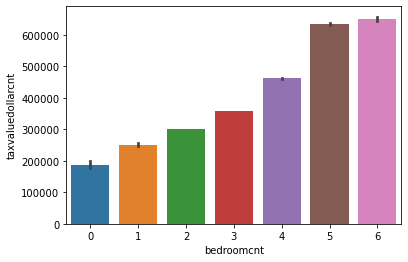

In [13]:
sns.barplot(x ='bedroomcnt', y = 'taxvaluedollarcnt', data = train)

for col in cols:
    sns.lmplot(x = col, y = 'taxvaluedollarcnt' , hue = 'fips', data = train, x_bins = 20)

sns.lmplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt' , hue = 'fips', data = train, x_bins = 20)

plt.figure(figsize=(8,6))
sns.heatmap(train, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(train))
plt.ylim(0, 4)

plt.show()

In [14]:
columns = ['bedroomcnt' , 'bathroomcnt', 'calculatedfinishedsquarefeet' , 'taxvaluedollarcnt']

plt.figure(figsize = (8,6))
sns.heatmap(columns, cmap = 'Purple', annot = True, linewidth= .5, mask = np.triu(columns))
plt.ylim(0,4)

plt.show()

In [15]:
columns_corr =train.corr()
columns_corr

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
bedroomcnt,1.000000,0.627991,0.525834,0.275822,0.385493,0.277242
bathroomcnt,0.627991,1.000000,0.701345,0.510968,0.532832,0.512550
calculatedfinishedsquarefeet,0.525834,0.701345,1.000000,0.505678,0.410647,0.502960
taxvaluedollarcnt,0.275822,0.510968,0.505678,1.000000,0.275569,0.975901
yearbuilt,0.385493,0.532832,0.410647,0.275569,1.000000,0.281993
taxamount,0.277242,0.512550,0.502960,0.975901,0.281993,1.000000


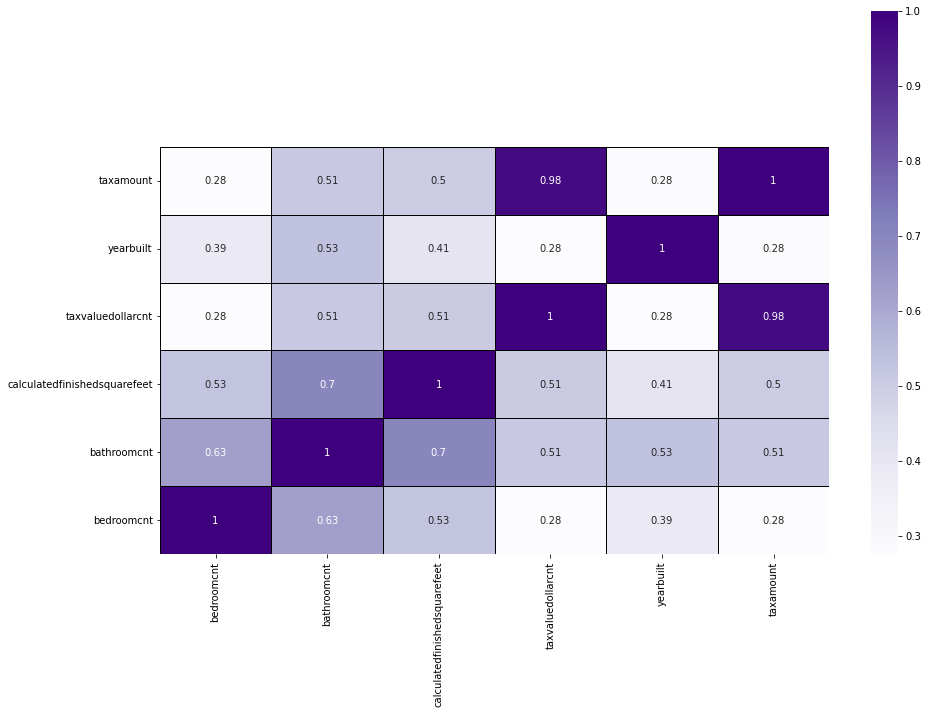

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(columns_corr, cmap='Purples', annot= True, linewidth=0.5,linecolor = 'k')
plt.ylim(0, 8)

plt.show()

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

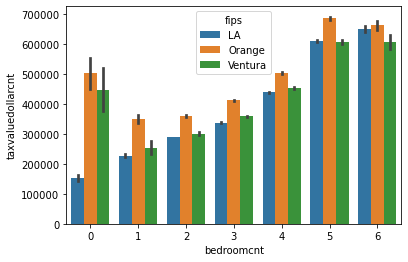

In [17]:
sns.barplot(x ='bedroomcnt', y = 'taxvaluedollarcnt', hue = 'fips', data = train)

<AxesSubplot:xlabel='bathroomcnt', ylabel='taxvaluedollarcnt'>

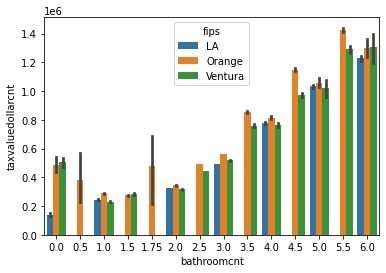

In [18]:
sns.barplot(x ='bathroomcnt', y = 'taxvaluedollarcnt', hue = 'fips', data = train)

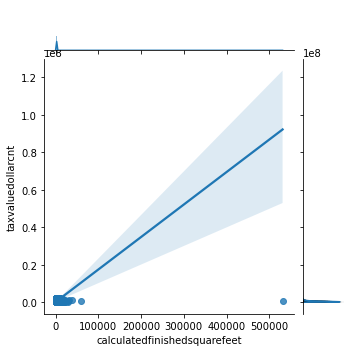

In [19]:
sns.jointplot(x = 'calculatedfinishedsquarefeet' , y = 'taxvaluedollarcnt', data = train, kind = 'reg', height = 5)
plt.show()

## 3 Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [20]:
def plot_variable_pairs():
    for col in columns:
        sns.lmplot(x = col, y = 'taxvaluedollarcnt' , hue = 'fips', data = train, x_bins = 20)

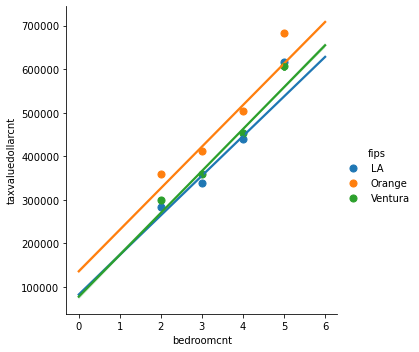

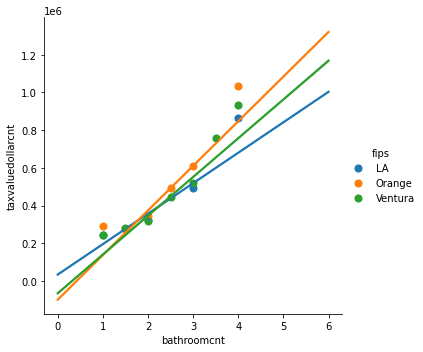

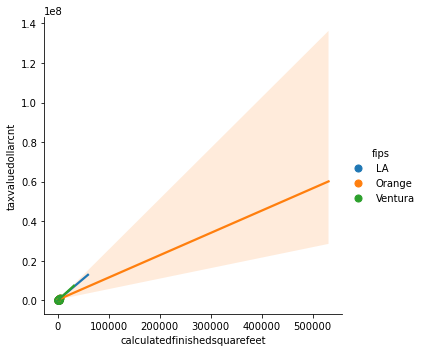

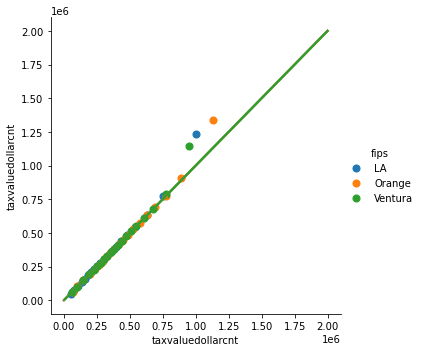

In [21]:
plot_variable_pairs()